# Python as a Financial Calculator 

## Time Value of Money (Basic Python)

### Present value of single cashflow

$$PV=\frac{FV}{(1+r)^n}$$

In [1]:
def pv(fv, r, n):
    '''
    Present value of a single cashflow
    
    -------
    
    fv : future value
    r : interest rates
    n : number of periods
    '''
    return fv / (1+r)**n

In [2]:
pv(100, 0.01, 1)

99.00990099009901

In [3]:
pv(100, 0.01, 0)

100.0

In [4]:
pv?

### Present value of perpetuity

$$PV = \frac{c}{r}$$

In [5]:
def pv_perpetuity(c, r):
    '''
    Present value of perpetuity
    
    -----
    
    c : cashflow
    f: interest rates
    '''
    return c / r

In [6]:
pv_perpetuity(100, 0.01)

10000.0

In [7]:
int_range = [0.01, 0.02, 0.05, 0.1]

In [8]:
for int_ in int_range:
    print("[INFO] Interest Rate = {0}%, Present Value = {1}".format(int_ * 100, pv_perpetuity(100, int_)))

[INFO] Interest Rate = 1.0%, Present Value = 10000.0
[INFO] Interest Rate = 2.0%, Present Value = 5000.0
[INFO] Interest Rate = 5.0%, Present Value = 2000.0
[INFO] Interest Rate = 10.0%, Present Value = 1000.0


### Present value of cashflow with constant growth

In [9]:
def pv_constant_growth(c, r, g):
    '''
    Present value of cashflow with constant growth
    Often used in calculating present value of dividend paying company with constant growth
    -----
    
    c : first cash flow
    r : discount rate / interest rates
    g : growth rate
    '''
    if r < g:
        print("Unable to compute because the required rate of return is lower than the growth rate")
    else:
        return c / (r - g)    

In [10]:
pv_constant_growth(c=100, r=0.02, g=0.05)

Unable to compute because the required rate of return is lower than the growth rate


In [11]:
pv_constant_growth(c=100, r=0.07, g=0.05)

4999.999999999999

# Call Option (Scipy and Numpy)

[The Complete Guide to Option Pricing Formulas / Edition 2 by Espen Haug](https://www.amazon.com/Complete-Guide-Option-Pricing-Formulas/dp/0071389970)

In [12]:
def BlackScholes(S, X, T, r, sigma):
    '''
    Valuation of European call option
    Black-Scholes (1973)
    
    
    Parameters    
    ==========    
    S : float        
        stock price
    X : float        
        strike price of option  
    T : float        
        time to expiration in years    
    r : float       
        risk-free interest rate 
    sigma : float        
            volatility of the relative price change of the
            underlying stock price
    N(x) : The cumulative normal distribution function
    
    Returns    
    =======    
    call value : float        
                 present value of the European call option   
       
    Example
    =======
    BlackScholes(S=60, X=65, T=0.25, r=0.08, sigma=0.3)
    >>> 2.1333684449162007
    
    '''
    import numpy as np
    from scipy import stats
    
    d1 = (np.log(S/X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    n_d1 = stats.norm.cdf(d1)
    n_d2 = stats.norm.cdf(d2)
    call = S * n_d1 - X * np.exp(-r * T) * n_d2
    return call

In [13]:
BlackScholes(S=60, X=65, T=0.25, r=0.08, sigma=0.3)

2.1333684449162007

# Intro to Numpy and Scipy - Linear Regression, CAPM (Numpy, matplotlib, scipy, statsmodel)

## Interpolation

[doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

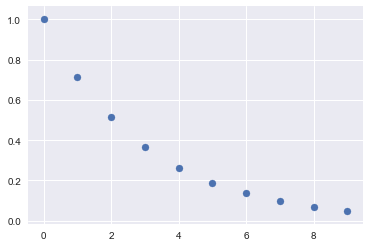

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np; import seaborn as sns; sns.set()
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3.0)
plt.scatter(x, y);

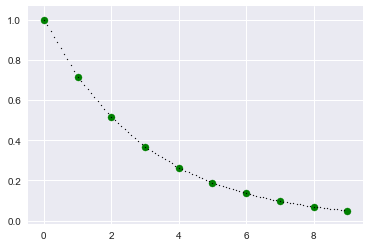

In [15]:
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.scatter(x, y, s=50, c="green");
plt.scatter(xnew, ynew, s=1, c='black');

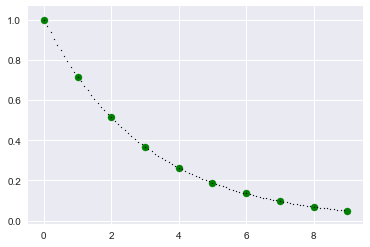

In [16]:
f = interpolate.interp1d(x, y, kind='cubic')
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.scatter(x, y, s=50, c="green");
plt.scatter(xnew, ynew, s=1, c='black');

## Optimisation

In [17]:
import scipy.optimize as optimize

Estimate the value of $x$ that minimise the equation $x^2+x-18$

In [18]:
def func(x):
    return x**2 + x - 18

In [19]:
optimize.fmin(func, 1)    # Setting 1 as the initial value

Optimization terminated successfully.
         Current function value: -18.250000
         Iterations: 18
         Function evaluations: 36


array([-0.5])

## CAPM

$$r_i-r_f=\alpha+\beta_i(r_{mkt}-r_f)$$

### Scipy

In [20]:
stock_rtns = [0.2, 0.1, 0.12, 0.06, 0.04, 0.05, 0.07, 0.10]
market_rtns = [0.15, 0.12, 0.10, 0.05, 0.03, 0.04, 0.06, 0.09]

In [21]:
from scipy import stats

In [22]:
beta, alpha, rho, p_value, std_error = stats.linregress(market_rtns, stock_rtns)

In [23]:
stats.linregress?

In [24]:
beta

1.145161290322581

In [25]:
alpha

0.0008870967741935187

In [26]:
rho**2

0.8766194243978788

In [27]:
p_value

0.0006162919266844232

### Statsmodels

In [28]:
import statsmodels.api as sm

/Users/anthonyn/anaconda3/envs/dl4finance_2/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [29]:
X = sm.add_constant(market_rtns)

In [30]:
np.c_[np.ones(len(stock_rtns)), market_rtns]

array([[1.  , 0.15],
       [1.  , 0.12],
       [1.  , 0.1 ],
       [1.  , 0.05],
       [1.  , 0.03],
       [1.  , 0.04],
       [1.  , 0.06],
       [1.  , 0.09]])

In [31]:
model = sm.OLS(stock_rtns, np.c_[np.ones(len(stock_rtns)), market_rtns])

In [32]:
results = model.fit()

In [33]:
results.summary()

/Users/anthonyn/anaconda3/envs/dl4finance_2/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     42.63
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           0.000616
Time:                        11:53:53   Log-Likelihood:                 21.285
No. Observations:                   8   AIC:                            -38.57
Df Residuals:                       6   BIC:                            -38.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.016      0.057      0.957      -0.037       0.039
x1             1.1452      0.175      6.529      0.001       0.716       1.574
==============================================================================
Omnibus:                        6.537   Durbin-Watson:                   2.707
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                1.563
Skew:                          -0.919   Prob(JB):                        0.458
Kurtosis:                       4.144   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Risk and Returns (Pandas, Matplotlib, Bokeh)

### Return Distribution

In [37]:
!pip install pandas_datareader

  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 112kB 1.0MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored


In [38]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(1990, 1, 1)
end = datetime(2018, 1, 1)
prices = web.DataReader(['TSLA'], 'morningstar', start, end)

In [39]:
tesla = prices['Close'].pct_change()

In [40]:
mu = tesla.mean()
sigma = tesla.std()

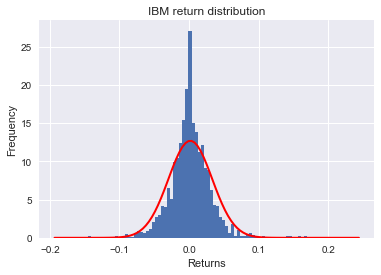

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
tesla = tesla.dropna()
[n, bins, patches] = plt.hist(tesla.values, 100, normed=True) 
x = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, x, color='red', lw=2) 
plt.title("IBM return distribution") 
plt.xlabel("Returns") 
plt.ylabel("Frequency");

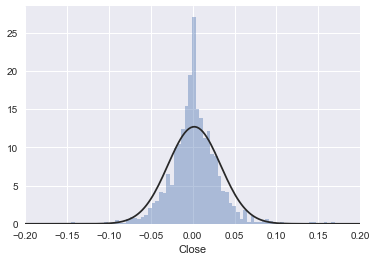

In [42]:
from scipy.stats import norm
plt.xlim(np.round(tesla.min(),1), np.round(tesla.max(),1))
sns.distplot(tesla, bins=100, fit=norm, kde=False);

### Candlesticks

In [43]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from math import pi

import pandas_datareader.data as web
from datetime import datetime
start = datetime(2017, 10, 1)
end = datetime(2018, 1, 1)
prices = web.DataReader('F', 'morningstar', start, end)

In [44]:
f = prices.reset_index().set_index("Date")[['Close', 'High', 'Low', 'Open', 'Volume']]
f

,Close,High,Low,Open,Volume
Date,,,,,
2017-10-02,12.09,12.090,11.9700,12.000,36008177
2017-10-03,12.34,12.430,12.2200,12.320,65627218
2017-10-04,12.30,12.460,12.2800,12.330,52885899
2017-10-05,12.25,12.360,12.1500,12.340,48138947
2017-10-06,12.31,12.330,12.1925,12.200,35090990
2017-10-09,12.34,12.410,12.2500,12.330,28924795
2017-10-10,12.39,12.420,12.2500,12.340,40586234
2017-10-11,12.38,12.430,12.3100,12.380,34953438
2017-10-12,12.12,12.320,12.1100,12.300,46125263


In [45]:
inc = f.Close > f.Open
dec = f.Open > f.Close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
output_notebook()
p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=800, title = "F Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3
p.segment(f.index, f.High, f.index, f.Low, color="black")
p.vbar(f.index[inc], w, f.Open[inc], f.Close[inc], fill_color="#2aff04", line_color="black")
p.vbar(f.index[dec], w, f.Open[dec], f.Close[dec], fill_color="#F2583E", line_color="black")
#output_file("candlestick.html", title="candlestick.py example")
show(p);  # open a browser

Loading BokehJS ...

### Comparing return versus volatility for several stocks 

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import pandas_datareader.data as web
from datetime import datetime
start = datetime(2015, 1, 1)
end = datetime(2016, 1, 1)
prices = web.DataReader(['SPY', 'KO', 'V', 'DIS'], 'morningstar', start, end)
returns = prices["Close"].unstack(level=-1).T.dropna().pct_change().dropna()
rtn = np.array(returns.mean()) * 250
vol = np.array(returns.std()) * np.sqrt(250)

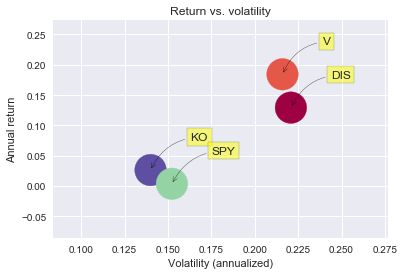

In [47]:
labels = ['{0}'.format(i) for i in returns.columns]
plt.xlabel('Volatility (annualized)')
plt.ylabel('Annual return')
plt.title('Return vs. volatility')


color = np.array([ 0.18, 0.96, 0.75, 0.3])
plt.scatter(vol, rtn, marker = 'o', c=color,s = 1000, 
            cmap=plt.get_cmap('Spectral'));


for label, x, y in zip(labels, vol, rtn):
    plt.annotate(label, 
                 xy = (x,y), 
                 xytext = (40, 30), 
                 textcoords = 'offset points',
                 bbox = dict(boxstyle = 'square, pad=0.3',
                             fc = 'yellow', 
                             alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', 
                                   connectionstyle = 'arc3, rad = 0.3'))

[matplotlib doc on annotation](https://matplotlib.org/2.0.2/users/annotations.html)

# Time Series Analysis (Pandas, Scipy)

### Data

In [49]:
import pandas_datareader.data as web

In [50]:
from datetime import datetime

In [51]:
start = datetime(2017, 1, 1)
end = datetime(2018, 1, 1)

In [52]:
prices = web.DataReader(['SPY', 'IBM', 'MSFT', 'XOM'], 'morningstar', start, end)

In [53]:
prices

Close      High       Low     Open     Volume
Symbol Date                                                      
SPY    2017-01-02  223.53  224.8300  222.7300  224.730          0
       2017-01-03  225.24  225.8300  223.8837  225.040   91366522
       2017-01-04  226.58  226.7500  225.6100  225.620   78744433
       2017-01-05  226.40  226.5800  225.4800  226.270   78379012
       2017-01-06  227.21  227.7500  225.9000  226.530   71559922
       2017-01-09  226.46  227.0701  226.4163  226.910   46939676
       2017-01-10  226.46  227.4500  226.0100  226.480   63771939
       2017-01-11  227.10  227.1000  225.5900  226.360   74650016
       2017-01-12  226.53  226.7500  224.9550  226.500   72113181
       2017-01-13  227.05  227.4000  226.6900  226.730   62717865
       2017-01-16  227.05  227.4000  226.6900  226.730          0
       2017-01-17  226.25  226.7800  225.8000  226.310   61240814
       2017-01-18  226.75  226.8000  225.9000  226.535   54793302
       2017-01-19  225.91  227.0000  225.4100  226.840   66608787
       2017-01-20  226.74  227.3100  225.9719  226.700  129168623
       2017-01-23  226.15  226.8050  225.2700  226.350   75061645
       2017-01-24  227.60  228.0800  226.2700  226.400   95555295
       2017-01-25  229.57  229.5700  228.5100  228.700   84437712
       2017-01-26  229.33  229.7100  229.0100  229.400   59970719
       2017-01-27  228.97  229.5900  228.7600  229.420   59711118
       2017-01-30  227.55  228.2000  226.4100  228.170   79737252
       2017-01-31  227.53  227.6000  226.3200  226.980   75880805
       2017-02-01  227.62  228.5900  226.9400  228.255   79117651
       2017-02-02  227.77  228.1000  226.8200  227.200   69657560
       2017-02-03  229.34  229.5500  228.4600  228.820   80563168
       2017-02-06  228.93  229.3260  228.5400  228.870   57790108
       2017-02-07  228.94  229.6556  228.7200  229.380   57931151
       2017-02-08  229.24  229.3900  228.3100  228.610   51566218
       2017-02-09  230.60  230.9500  229.5200  229.560   65955245
       2017-02-10  231.51  231.7700  230.6216  231.000   66015891
...                   ...       ...       ...      ...        ...
XOM    2017-11-21   80.87   81.2500   80.6400   80.690    8838367
       2017-11-22   81.10   81.4051   81.0500   81.160    7941632
       2017-11-23   81.10   81.1000   81.1000   81.100          0
       2017-11-24   81.42   81.7000   81.2200   81.440    3851283
       2017-11-27   81.11   81.4000   81.0200   81.320    9127527
       2017-11-28   81.67   81.9990   81.3100   81.410    9794574
       2017-11-29   82.27   82.3100   81.4800   81.650    9724992
       2017-11-30   83.29   83.4000   82.4100   82.450   18592679
       2017-12-01   83.46   84.1300   82.4100   83.440   13779254
       2017-12-04   83.57   84.1750   83.0000   83.210   12597705
       2017-12-05   82.89   83.7700   82.7100   83.500    9357185
       2017-12-06   82.28   83.2000   82.2100   83.080   13398866
       2017-12-07   82.55   82.6200   82.1700   82.400   11359598
       2017-12-08   82.66   82.9000   82.2600   82.750   11988633
       2017-12-11   83.03   83.2500   82.7400   82.950    8760735
       2017-12-12   82.76   83.3800   82.7000   83.090   11307030
       2017-12-13   83.12   83.3000   82.4800   82.610   10172650
       2017-12-14   82.90   83.3300   82.8900   83.030    9492394
       2017-12-15   83.03   83.2800   82.8700   83.160   26582332
       2017-12-18   82.94   83.6744   82.9100   83.180    9363466
       2017-12-19   82.44   83.1700   82.3300   83.030   10285052
       2017-12-20   82.87   83.1400   82.5201   82.600   10620305
       2017-12-21   83.85   84.2700   82.9600   83.350   13578133
       2017-12-22   83.97   84.0200   83.6000   83.880   10161447
       2017-12-25   83.97   83.9700   83.9700   83.970          0
       2017-12-26   83.98   84.3600   83.9000   83.960    4777216
       2017-12-27   83.90   84.1000   83.7400   83.990    7000612
       2017-12-28   84.02   84.0500   83.8000   83.980    74

In [54]:
prices['returns'] = prices['Close'].pct_change()

In [55]:
prices

Close      High       Low     Open     Volume   returns
Symbol Date                                                                
SPY    2017-01-02  223.53  224.8300  222.7300  224.730          0       NaN
       2017-01-03  225.24  225.8300  223.8837  225.040   91366522  0.007650
       2017-01-04  226.58  226.7500  225.6100  225.620   78744433  0.005949
       2017-01-05  226.40  226.5800  225.4800  226.270   78379012 -0.000794
       2017-01-06  227.21  227.7500  225.9000  226.530   71559922  0.003578
       2017-01-09  226.46  227.0701  226.4163  226.910   46939676 -0.003301
       2017-01-10  226.46  227.4500  226.0100  226.480   63771939  0.000000
       2017-01-11  227.10  227.1000  225.5900  226.360   74650016  0.002826
       2017-01-12  226.53  226.7500  224.9550  226.500   72113181 -0.002510
       2017-01-13  227.05  227.4000  226.6900  226.730   62717865  0.002296
       2017-01-16  227.05  227.4000  226.6900  226.730          0  0.000000
       2017-01-17  226.25  226.7800  225.8000  226.310   61240814 -0.003523
       2017-01-18  226.75  226.8000  225.9000  226.535   54793302  0.002210
       2017-01-19  225.91  227.0000  225.4100  226.840   66608787 -0.003705
       2017-01-20  226.74  227.3100  225.9719  226.700  129168623  0.003674
       2017-01-23  226.15  226.8050  225.2700  226.350   75061645 -0.002602
       2017-01-24  227.60  228.0800  226.2700  226.400   95555295  0.006412
       2017-01-25  229.57  229.5700  228.5100  228.700   84437712  0.008656
       2017-01-26  229.33  229.7100  229.0100  229.400   59970719 -0.001045
       2017-01-27  228.97  229.5900  228.7600  229.420   59711118 -0.001570
       2017-01-30  227.55  228.2000  226.4100  228.170   79737252 -0.006202
       2017-01-31  227.53  227.6000  226.3200  226.980   75880805 -0.000088
       2017-02-01  227.62  228.5900  226.9400  228.255   79117651  0.000396
       2017-02-02  227.77  228.1000  226.8200  227.200   69657560  0.000659
       2017-02-03  229.34  229.5500  228.4600  228.820   80563168  0.006893
       2017-02-06  228.93  229.3260  228.5400  228.870   57790108 -0.001788
       2017-02-07  228.94  229.6556  228.7200  229.380   57931151  0.000044
       2017-02-08  229.24  229.3900  228.3100  228.610   51566218  0.001310
       2017-02-09  230.60  230.9500  229.5200  229.560   65955245  0.005933
       2017-02-10  231.51  231.7700  230.6216  231.000   66015891  0.003946
...                   ...       ...       ...      ...        ...       ...
XOM    2017-11-21   80.87   81.2500   80.6400   80.690    8838367  0.003973
       2017-11-22   81.10   81.4051   81.0500   81.160    7941632  0.002844
       2017-11-23   81.10   81.1000   81.1000   81.100          0  0.000000
       2017-11-24   81.42   81.7000   81.2200   81.440    3851283  0.003946
       2017-11-27   81.11   81.4000   81.0200   81.320    9127527 -0.003807
       2017-11-28   81.67   81.9990   81.3100   81.410    9794574  0.006904
       2017-11-29   82.27   82.3100   81.4800   81.650    9724992  0.007347
       2017-11-30   83.29   83.4000   82.4100   82.450   18592679  0.012398
       2017-12-01   83.46   84.1300   82.4100   83.440   13779254  0.002041
       2017-12-04   83.57   84.1750   83.0000   83.210   12597705  0.001318
       2017-12-05   82.89   83.7700   82.7100   83.500    9357185 -0.008137
       2017-12-06   82.28   83.2000   82.2100   83.080   13398866 -0.007359
       2017-12-07   82.55   82.6200   82.1700   82.400   11359598  0.003281
       2017-12-08   82.66   82.9000   82.2600   82.750   11988633  0.001333
       2017-12-11   83.03   83.2500   82.7400   82.950    8760735  0.004476
       2017-12-12   82.76   83.3800   82.7000   83.090   11307030 -0.003252
       2017-12-13   83.12   83.3000   82.4800   82.610   10172650  0.004350
       2017-12-14   82.90   83.3300   82.8900   83.030    9492394 -0.002647
       2017-12-15   83.03   83.2800   82.8700   83.160   26582332  0.001568
       2017-12-18   82.94   83.6744   82.9100   83.180    9363466 -0

In [56]:
returns = prices["returns"].unstack(level=-1).T.dropna()
returns

Symbol,IBM,MSFT,SPY,XOM
Date,,,,
2017-01-03,0.007229,0.007081,0.007650,0.006980
2017-01-04,0.012381,-0.004474,0.005949,-0.011002
2017-01-05,-0.003309,0.000000,-0.000794,-0.014907
2017-01-06,0.004920,0.008668,0.003578,-0.000565
2017-01-09,-0.011089,-0.003183,-0.003301,-0.016497
2017-01-10,-0.012705,-0.000319,0.000000,-0.012753
2017-01-11,0.013473,0.009103,0.002826,0.010241
2017-01-12,0.001192,-0.009179,-0.002510,-0.005414
2017-01-13,-0.003632,0.001437,0.002296,0.000116


In [57]:
prices.unstack?

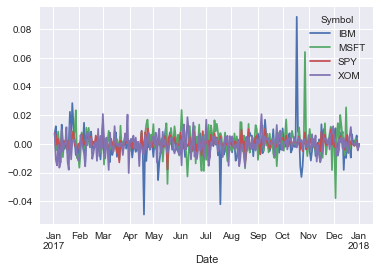

In [58]:
%matplotlib inline
returns.plot();

In [59]:
from scipy import stats

T-Test with p-value. Is the returns significantly different from zero?

In [60]:
for oo in returns.columns:
    print("{} \t {}".format(oo, stats.ttest_1samp(returns[oo], 0)))

IBM 	 Ttest_1sampResult(statistic=-0.4205707215208964, pvalue=0.6744173148634006)
MSFT 	 Ttest_1sampResult(statistic=2.238246348043851, pvalue=0.02605511950461849)
SPY 	 Ttest_1sampResult(statistic=2.6554355063814863, pvalue=0.008411633872026583)
XOM 	 Ttest_1sampResult(statistic=-0.6116025757271741, pvalue=0.5413371952094352)


### Bartlett’s test for equal variances


[doc](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.bartlett.html)


Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. For samples from significantly non-normal populations, Levene’s test levene is more robust.

In [61]:
import scipy as sp 

In [62]:
print(sp.stats.bartlett(returns["IBM"], returns["MSFT"]))

BartlettResult(statistic=1.1751134011071522, pvalue=0.2783530598876065)


### Levene test for equal variances.

[doc](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.levene.html)

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

In [63]:
print(sp.stats.levene(returns["IBM"], returns["MSFT"]))

LeveneResult(statistic=0.16840671003005245, pvalue=0.6817013955190343)


### Jan Month Effect

In [64]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(1960, 1, 1)
end = datetime(2018, 1, 1)
prices = web.DataReader('SPY', 'morningstar', start, end)

In [65]:
prices['returns'] = prices['Close'].pct_change()

In [66]:
prices.head()

Close  High  Low  Open  Volume  returns
Symbol Date                                               
SPY    1993-01-22  43.94   NaN  NaN   NaN       0      NaN
       1993-01-25  43.94   NaN  NaN   NaN       0      0.0
       1993-01-26  43.94   NaN  NaN   NaN       0      0.0
       1993-01-27  43.94   NaN  NaN   NaN       0      0.0
       1993-01-28  43.94   NaN  NaN   NaN       0      0.0

In [67]:
prices.tail()

Close      High      Low    Open    Volume   returns
Symbol Date                                                             
SPY    2017-12-26  267.19  267.4377  266.885  267.05  45244433 -0.001196
       2017-12-27  267.32  267.7300  267.010  267.38  57750986  0.000487
       2017-12-28  267.87  267.9200  267.450  267.89  45116139  0.002057
       2017-12-29  266.86  268.5500  266.640  268.53  96007424 -0.003770
       2018-01-01  266.86  266.8600  266.860  266.86         0  0.000000

In [68]:
mth_price = prices.reset_index().set_index("Date")['Close'].resample('BM').last()
mth_price

Date
1993-01-29     43.9400
1993-02-26     44.4100
1993-03-31     45.1900
1993-04-30     44.0300
1993-05-31     45.2200
1993-06-30     45.0600
1993-07-30     44.8400
1993-08-31     46.5600
1993-09-30     45.9400
1993-10-29     46.8400
1993-11-30     46.3400
1993-12-31     46.5900
1994-01-31     48.2200
1994-02-28     46.8100
1994-03-31     44.5900
1994-04-29     45.0900
1994-05-31     45.8100
1994-06-30     44.4700
1994-07-29     45.9100
1994-08-31     47.6600
1994-09-30     46.1700
1994-10-31     47.4800
1994-11-30     45.5900
1994-12-30     45.5600
1995-01-31     47.0900
1995-02-28     49.0200
1995-03-31     50.1100
1995-04-28     51.5900
1995-05-31     53.6400
1995-06-30     54.4100
                ...   
2015-08-31    197.6700
2015-09-30    191.6300
2015-10-30    207.9300
2015-11-30    208.6900
2015-12-31    203.8700
2016-01-29    193.7208
2016-02-29    193.5600
2016-03-31    205.5200
2016-04-29    206.3308
2016-05-31    209.8400
2016-06-30    209.4750
2016-07-29    217.1200
2016-0

In [69]:
mth_rtns = mth_price.pct_change()
mth_rtns.head()

Date
1993-01-29         NaN
1993-02-26    0.010696
1993-03-31    0.017564
1993-04-30   -0.025669
1993-05-31    0.027027
Freq: BM, Name: Close, dtype: float64

In [70]:
jan_rtns = mth_rtns[mth_rtns.index.month==1]

In [71]:
other_rtns = mth_rtns[mth_rtns.index.month!=1]

In [72]:
import scipy as sp
print(sp.stats.bartlett(jan_rtns, other_rtns))

BartlettResult(statistic=0.058891633140113045, pvalue=0.8082564134914634)


### 52 week high low range

In [73]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [74]:
prices.head()

Close  High  Low  Open  Volume  returns
Symbol Date                                               
SPY    1993-01-22  43.94   NaN  NaN   NaN       0      NaN
       1993-01-25  43.94   NaN  NaN   NaN       0      0.0
       1993-01-26  43.94   NaN  NaN   NaN       0      0.0
       1993-01-27  43.94   NaN  NaN   NaN       0      0.0
       1993-01-28  43.94   NaN  NaN   NaN       0      0.0

In [75]:
current_date = datetime.now()
one_yr_delta = current_date - relativedelta(years=1)
one_yr_delta

datetime.datetime(2017, 6, 25, 11, 55, 0, 191218)

In [76]:
prices.index.get_level_values(1)

DatetimeIndex(['1993-01-22', '1993-01-25', '1993-01-26', '1993-01-27',
               '1993-01-28', '1993-01-29', '1993-02-01', '1993-02-02',
               '1993-02-03', '1993-02-04',
               ...
               '2017-12-19', '2017-12-20', '2017-12-21', '2017-12-22',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2018-01-01'],
              dtype='datetime64[ns]', name='Date', length=6507, freq=None)

In [77]:
tmp = prices.reset_index().set_index('Date') 
print(tmp[tmp.index > one_yr_delta].head())
print(tmp[tmp.index > one_yr_delta].tail())
high = tmp[tmp.index > one_yr_delta]['Close'].max()
low = tmp[tmp.index > one_yr_delta]['Close'].min()

           Symbol   Close     High      Low    Open     Volume   returns
Date                                                                    
2017-06-26    SPY  243.29  244.380  243.045  243.90   56700477  0.000658
2017-06-27    SPY  241.33  243.380  241.310  243.04   82247666 -0.008056
2017-06-28    SPY  243.49  243.715  242.230  242.50   70042599  0.008950
2017-06-29    SPY  241.35  243.720  239.955  243.66  106949719 -0.008789
2017-06-30    SPY  241.80  242.710  241.575  242.28   86820694  0.001865
           Symbol   Close      High      Low    Open    Volume   returns
Date                                                                    
2017-12-26    SPY  267.19  267.4377  266.885  267.05  45244433 -0.001196
2017-12-27    SPY  267.32  267.7300  267.010  267.38  57750986  0.000487
2017-12-28    SPY  267.87  267.9200  267.450  267.89  45116139  0.002057
2017-12-29    SPY  266.86  268.5500  266.640  268.53  96007424 -0.003770
2018-01-01    SPY  266.86  266.8600  266.860  266.8

In [78]:
current_price = float(tmp[tmp.index == tmp.index[-1]].Close)

In [79]:
print("Current price, 52-week high-low : {}, {}, {}".format(current_price, high, low))

Current price, 52-week high-low : 266.86, 268.2, 240.55


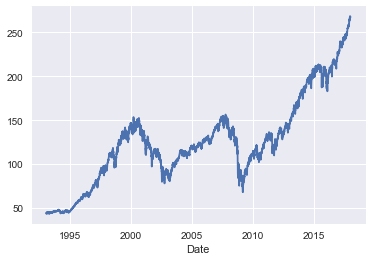

In [80]:
tmp.Close.plot();

### Fama-French

In [89]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
import statsmodels.api as sm
import pandas as pd

In [90]:
dataset = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench')

In [91]:
print(dataset[0].head())
print(dataset[0].tail())

         Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                         
2010-01   -3.36  0.30  0.31 -1.32  0.44  0.00
2010-02    3.40  1.46  3.16 -0.46  1.40  0.00
2010-03    6.31  1.77  2.10 -0.62  1.71  0.01
2010-04    2.00  5.05  2.81  0.91  1.70  0.01
2010-05   -7.89  0.04 -2.38  1.08 -0.22  0.01
         Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                         
2017-12    1.06 -1.04  0.11  0.78  1.62  0.09
2018-01    5.58 -3.13 -1.41  0.12 -0.91  0.11
2018-02   -3.65  0.38 -1.20  0.72 -2.25  0.11
2018-03   -2.35  3.54 -0.08 -0.51 -0.03  0.12
2018-04    0.29  0.90  0.52 -1.97  1.18  0.14


In [92]:
start = datetime(2010, 1, 1)
end = datetime(2018, 1, 1)
prices = web.DataReader('XOM', 'morningstar', start, end)['Close']

In [93]:
xom = prices.reset_index(level=0, drop=True).resample('BM').last()
rtns = xom.pct_change()
rtns.head()

Date
2010-01-29         NaN
2010-02-26    0.008847
2010-03-31    0.030462
2010-04-30    0.011795
2010-05-31   -0.107865
Freq: BM, Name: Close, dtype: float64

In [94]:
rtns = rtns.reset_index()
rtns

,Date,Close
0,2010-01-29,NaN
1,2010-02-26,0.008847
2,2010-03-31,0.030462
3,2010-04-30,0.011795
4,2010-05-31,-0.107865
5,2010-06-30,-0.056070
6,2010-07-30,0.045733
7,2010-08-31,-0.009551
8,2010-09-30,0.045339
9,2010-10-29,0.076064


In [95]:
rtns_date = []
for oo in rtns.Date:
    rtns_date.append(''.join([oo.strftime("%Y"), "-", oo.strftime("%m")]))

In [96]:
rtns_date = pd.to_datetime(rtns_date, format="%Y-%m", errors="ignore").to_period()
rtns['mth_date'] = rtns_date
rtns = rtns.set_index('mth_date')
rtns.pop("Date")
rtns

,Close
mth_date,
2010-01,NaN
2010-02,0.008847
2010-03,0.030462
2010-04,0.011795
2010-05,-0.107865
2010-06,-0.056070
2010-07,0.045733
2010-08,-0.009551
2010-09,0.045339


In [97]:
dataset[0]

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01,-3.36,0.30,0.31,-1.32,0.44,0.00
2010-02,3.40,1.46,3.16,-0.46,1.40,0.00
2010-03,6.31,1.77,2.10,-0.62,1.71,0.01
2010-04,2.00,5.05,2.81,0.91,1.70,0.01
2010-05,-7.89,0.04,-2.38,1.08,-0.22,0.01
2010-06,-5.56,-2.51,-4.50,-0.18,-1.54,0.01
2010-07,6.93,0.07,-0.27,0.13,1.99,0.01
2010-08,-4.77,-3.13,-1.95,0.48,-1.70,0.01
2010-09,9.54,3.73,-3.12,-0.09,0.49,0.01


In [98]:
combined = rtns.join(dataset[0]).dropna()
combined

,Close,Mkt-RF,SMB,HML,RMW,CMA,RF
mth_date,,,,,,,
2010-02,0.008847,3.40,1.46,3.16,-0.46,1.40,0.00
2010-03,0.030462,6.31,1.77,2.10,-0.62,1.71,0.01
2010-04,0.011795,2.00,5.05,2.81,0.91,1.70,0.01
2010-05,-0.107865,-7.89,0.04,-2.38,1.08,-0.22,0.01
2010-06,-0.056070,-5.56,-2.51,-4.50,-0.18,-1.54,0.01
2010-07,0.045733,6.93,0.07,-0.27,0.13,1.99,0.01
2010-08,-0.009551,-4.77,-3.13,-1.95,0.48,-1.70,0.01
2010-09,0.045339,9.54,3.73,-3.12,-0.09,0.49,0.01
2010-10,0.076064,3.88,0.79,-2.59,1.41,-0.22,0.01


In [99]:
y = combined.Close

In [100]:
x = combined[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x = sm.add_constant(x)

In [101]:
results=sm.OLS(y,x).fit() 

In [102]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     20.19
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           1.87e-13
Time:                        11:55:37   Log-Likelihood:                 200.14
No. Observations:                  96   AIC:                            -388.3
Df Residuals:                      90   BIC:                            -372.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0061      0.003     -1.757      0.082      -0.013       0.001
Mkt-RF         0.0076      0.001      7.726      0.000       0.006       0.010
SMB           -0.0011      0.002     -0.662      0.510      -0.004       0.002
HML            0.0024      0.002      1.260      0.211      -0.001       0.006
RMW            0.0007      0.002      0.300      0.765      -0.004       0.006
CMA            0.0089      0.003      3.006      0.003       0.003       0.015
==============================================================================
Omnibus:                        1.073   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                0.903
Skew:                           0.237   Prob(JB):                        0.637
Kurtosis:                       2.972   Cond. No.                         4.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Rolling Beta

In [103]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(1990, 1, 1)
end = datetime(2018, 1, 1)
prices = web.DataReader(['SPY', 'IBM', 'MSFT', 'XOM'], 'morningstar', start, end)

In [104]:
returns = prices["Close"].unstack(level=-1).T.dropna().resample('BM').last().pct_change().dropna()
returns

Symbol,IBM,MSFT,SPY,XOM
Date,,,,
1993-02-26,0.055829,-0.036142,0.010696,0.040900
1993-03-31,-0.064368,0.109461,0.017564,0.039293
1993-04-30,-0.044226,-0.075691,-0.025669,-0.001893
1993-05-31,0.084828,0.083349,0.027027,-0.007576
1993-06-30,-0.063977,-0.049955,-0.003538,0.009545
1993-07-30,-0.098738,-0.159091,-0.004882,-0.007561
1993-08-31,0.028090,0.015222,0.038359,-0.003810
1993-09-30,-0.081967,0.098181,-0.013316,0.001909
1993-10-29,0.095238,-0.028780,0.019591,-0.001905


In [105]:
import statsmodels.api as sm

In [106]:
ibm = returns.IBM

In [107]:
spy = returns.SPY

In [108]:
beta= []
for oo in range(60,len(returns)):
    model = sm.OLS(sm.add_constant(ibm[:oo]), spy[:oo]).fit()
    beta.append([spy[:oo].index[-1], float(model.params[1])])
beta = pd.DataFrame(beta)
beta.columns = ['Date', 'beta']
beta = beta.set_index('Date')

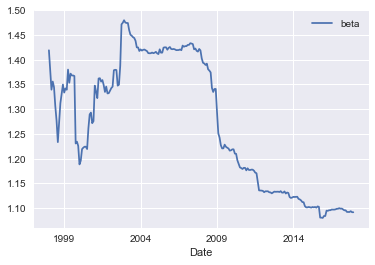

In [109]:
beta.plot();

### Efficient Frontier

Portfolio expected return

\begin{equation}
r_P = \sum^n_{i=1}w_ir_i
\end{equation}

\begin{equation}
r_P = w^Tr
\end{equation}

Variance for two-stocks portfolio

\begin{equation}
\sigma^2_P=w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w_1w_2\sigma_{1,2}=w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w_1w_2\rho\sigma_1\sigma_2
\end{equation}

Variance for multi-stocks portfolio

\begin{equation}
\sigma^2_P=w^T \sum w
\end{equation}



In [110]:
import numpy as np

In [111]:
np.random.seed(42)
returns = np.random.randint(0, 20, size=(10, 2)) / 100    # simulate returns
returns

array([[0.06, 0.19],
       [0.14, 0.1 ],
       [0.07, 0.06],
       [0.18, 0.1 ],
       [0.1 , 0.03],
       [0.07, 0.02],
       [0.01, 0.11],
       [0.05, 0.01],
       [0.  , 0.11],
       [0.11, 0.16]])

In [112]:
covariance = np.cov(returns.T)
covariance

array([[3.07666667e-03, 9.88888889e-05],
       [9.88888889e-05, 3.52111111e-03]])

In [113]:
weight = np.array([0.2, 0.8])

In [114]:
np.dot(weight.T, np.dot(np.cov(returns.T), weight))

0.0024082222222222218

In [115]:
print("Portfolio variance: {}".format(float(np.dot(np.dot(weight, covariance), weight.T))))

Portfolio variance: 0.0024082222222222218


In [116]:
print("Portfolio expected return: {}".format(float(np.dot(weight.T, returns.mean(axis=0)))))

Portfolio expected return: 0.08700000000000002


### Optimization 

[wolfram](http://www.wolframalpha.com/input/?i=x%5E2+-+4)

$$x^2 - 4x$$

In [117]:
from scipy.optimize import minimize

In [118]:
def f(x):
    return x**2 - 4

In [119]:
x0 = 0

In [120]:
result = minimize?

In [ ]:
result = minimize

In [121]:
result = minimize(f, x0, method="Nelder-Mead", options={"xtol" : 1e-10, 
                                                        'disp' : True})

Optimization terminated successfully.
         Current function value: -4.000000
         Iterations: 23
         Function evaluations: 53


In [122]:
print(result.x)

[0.]


In [123]:
result.fun

-4.0

### Portfolio Optimisation

#### Introduction

inspired by Yves Hilpisch excellent book `Python for Finance`

Portfolio expected return

\begin{equation}
r_P = \sum^n_{i=1}w_ir_i
\end{equation}

\begin{equation}
r_P = w^Tr
\end{equation}

Variance for two-stocks portfolio

\begin{equation}
\sigma^2_P=w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w^2_1w^2_2\sigma_{1,2}w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w^2_1w^2_2\rho\sigma_1\sigma_2
\end{equation}

Variance for multi-stocks portfolio

\begin{equation}
\sigma^2_P=w^T \sum w
\end{equation}



In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set()

import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2015, 1, 1)
end = datetime(2016, 1, 1)
tickers = ['TSLA', 'F', 'V', 'DIS', 'GLD']
prices = web.DataReader(tickers, 
                        'morningstar', start, end)
returns = prices["Close"].unstack(level=-1).T.dropna().pct_change().dropna()

In [125]:
returns.columns

Index(['DIS', 'F', 'GLD', 'TSLA', 'V'], dtype='object', name='Symbol')

Annualised Mean

In [126]:
print(returns.mean() * 250)

Symbol
DIS     0.129305
F      -0.068177
GLD    -0.098604
TSLA    0.144749
V       0.184272
dtype: float64


Variance - Covariance Matrix (Annualised)

In [127]:
returns.cov() * 250

Symbol,DIS,F,GLD,TSLA,V
Symbol,,,,,
DIS,0.048769,0.023655,-0.001848,0.021416,0.025235
F,0.023655,0.046393,-0.001221,0.028586,0.025863
GLD,-0.001848,-0.001221,0.018994,-0.001440,-0.000623
TSLA,0.021416,0.028586,-0.001440,0.144517,0.028851
V,0.025235,0.025863,-0.000623,0.028851,0.046650


In [128]:
portfolio_rtns = []
portfolio_vols = []
for oo in range(5000):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_rtns.append(np.sum(weights * returns.mean() * 250))
    portfolio_vols.append(np.sqrt(float(np.dot(np.dot(weights, returns.cov() * 250), weights.T))))

In [129]:
comb = pd.DataFrame([portfolio_rtns, portfolio_vols]).T
comb.columns = ['rtns', 'vols']
comb.head()

,rtns,vols
0,0.100943,0.224150
1,0.063026,0.198133
2,0.066503,0.153136
3,0.085495,0.182210
4,0.022952,0.129324


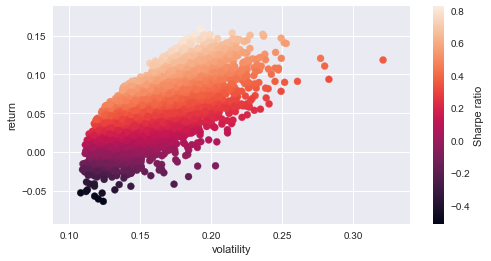

In [130]:
#sns.set(style='whitegrid')
plt.figure(figsize=(8, 4))
plt.scatter(portfolio_vols, portfolio_rtns, 
            c = np.array(portfolio_rtns) / np.array(portfolio_vols))
plt.grid(True)
plt.xlabel('volatility')
plt.ylabel('return')
plt.colorbar(label='Sharpe ratio');
#plt.axis('equal');
#plt.xlim(0, 0.25);
#plt.ylim(-0.10, 0.2);

In [131]:
 def portfolio_stats(weights):
        weights = np.array(weights)
        portfolio_rtn = np.sum(weights * returns.mean() * 250)
        portfolio_vol = np.sqrt(float(np.dot(np.dot(weights, returns.cov() * 250), weights.T)))
        return np.array([portfolio_rtn, portfolio_vol, portfolio_rtn / portfolio_vol])

In [132]:
import scipy.optimize as sco

#### Maximise Sharpe Ratio

In [133]:
def min_func_sharpe(weights):
    return - portfolio_stats(weights)[2]

In [134]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [135]:
bnds = tuple((0, 1) for x in range(len(tickers)))

In [136]:
%%time 
opts = sco.minimize(min_func_sharpe, len(tickers) * [1. / len(tickers),], 
                    method='SLSQP',
                    bounds=bnds, 
                    constraints=cons)

CPU times: user 41.8 ms, sys: 2.83 ms, total: 44.6 ms
Wall time: 43.8 ms


In [137]:
opts

     fun: -0.8707501662508689
     jac: array([-4.89152968e-04,  9.13164385e-01,  4.78498287e-01,  1.46009028e-04,
        1.07578933e-04])
 message: 'Optimization terminated successfully.'
    nfev: 35
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.83294934e-01, 3.65159292e-16, 0.00000000e+00, 4.68642604e-02,
       7.69840806e-01])

In [138]:
opts['x'].round(3)

array([0.183, 0.   , 0.   , 0.047, 0.77 ])

In [139]:
r, vol, sr = portfolio_stats(opts['x']).round(3)
print("Portfolio returns: {0}\nPortfolio volatility: {1}\nSharpe Ratio: {2}".format(r, vol, sr))

Portfolio returns: 0.172
Portfolio volatility: 0.198
Sharpe Ratio: 0.871


#### Minimise Variance

In [140]:
def min_func_variance(weights):             
    return portfolio_stats(weights)[1] ** 2

In [141]:
optv = sco.minimize(min_func_variance, len(tickers) * [1. / len(tickers),], 
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

In [142]:
optv

     fun: 0.011329439474188402
     jac: array([0.02238316, 0.02247733, 0.02271553, 0.02231178, 0.02294737])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.13208989, 0.12187922, 0.62350323, 0.01907   , 0.10345767])

In [143]:
optv['x'].round(3)

array([0.132, 0.122, 0.624, 0.019, 0.103])

In [144]:
r, vol, sr = portfolio_stats(optv['x']).round(3)
print("Portfolio returns: {0}\nPortfolio volatility: {1}\nSharpe Ratio: {2}".format(r, vol, sr))

Portfolio returns: -0.031
Portfolio volatility: 0.106
Sharpe Ratio: -0.29


#### Efficient Frontier

Minimum risk portfolio for given return level

In [145]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},                 
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})         
bnds = tuple((0, 1) for x in weights)

In [146]:
 def min_func_port(weights):             
        return portfolio_stats(weights)[1]

In [147]:
%%time

trets = np.linspace(0.0, 0.18, 100)         
tvols = []         
for tret in trets:             
    cons = ({'type': 'eq', 'fun': lambda x:  portfolio_stats(x)[0] - tret},                     
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})             
    res = sco.minimize(min_func_port, 
                       len(tickers) * [1. / len(tickers),], 
                       method='SLSQP',                                
                       bounds=bnds, constraints=cons)             
    tvols.append(res['fun'])         
tvols = np.array(tvols)

CPU times: user 9.82 s, sys: 35.1 ms, total: 9.85 s
Wall time: 9.9 s


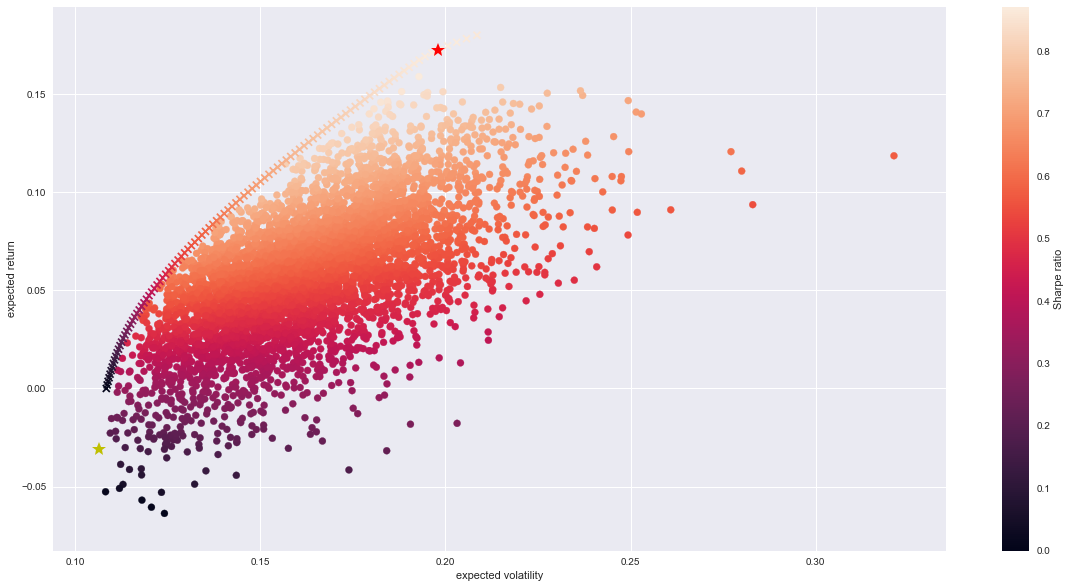

In [148]:
plt.figure(figsize=(20, 10))
plt.scatter(portfolio_vols, portfolio_rtns,                     
            c=np.array(portfolio_rtns) / np.array(portfolio_vols), 
            marker='o')                     
            # random portfolio composition         
plt.scatter(tvols, trets,    
            c=trets / tvols, marker='x')                     
            # efficient frontier         
plt.plot(portfolio_stats(opts['x'])[1], portfolio_stats(opts['x'])[0],                  
         'r*', markersize=15.0)                     
         # portfolio with highest Sharpe ratio         
plt.plot(portfolio_stats(optv['x'])[1], portfolio_stats(optv['x'])[0],                  
         'y*', markersize=15.0)                     
         # minimum variance portfolio         
plt.grid(True)         
plt.xlabel('expected volatility')         
plt.ylabel('expected return')         
plt.colorbar(label='Sharpe ratio');

#### Capital Market Line

In [149]:
import scipy.interpolate as sci

In [150]:
ind = np.argmin(tvols)         
evols = tvols[ind:]         
erets = trets[ind:] 

In [151]:
tck = sci.splrep(evols, erets)

In [152]:
 def f(x):             
        ''' Efficient frontier function (splines approximation). '''             
        return sci.splev(x, tck, der=0)         
    
def df(x):             
    ''' First derivative of efficient frontier function. '''             
    return sci.splev(x, tck, der=1) 

In [153]:
def equations(p, rf=0.01):             
    eq1 = rf - p[0]             
    eq2 = rf + p[1] * p[2] - f(p[2])             
    eq3 = p[1] - df(p[2])             
    return eq1, eq2, eq3

In [154]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [155]:
opt

array([0.01      , 0.82037734, 0.19919769])

In [156]:
np.round(equations(opt), 6)

array([ 0., -0.,  0.])

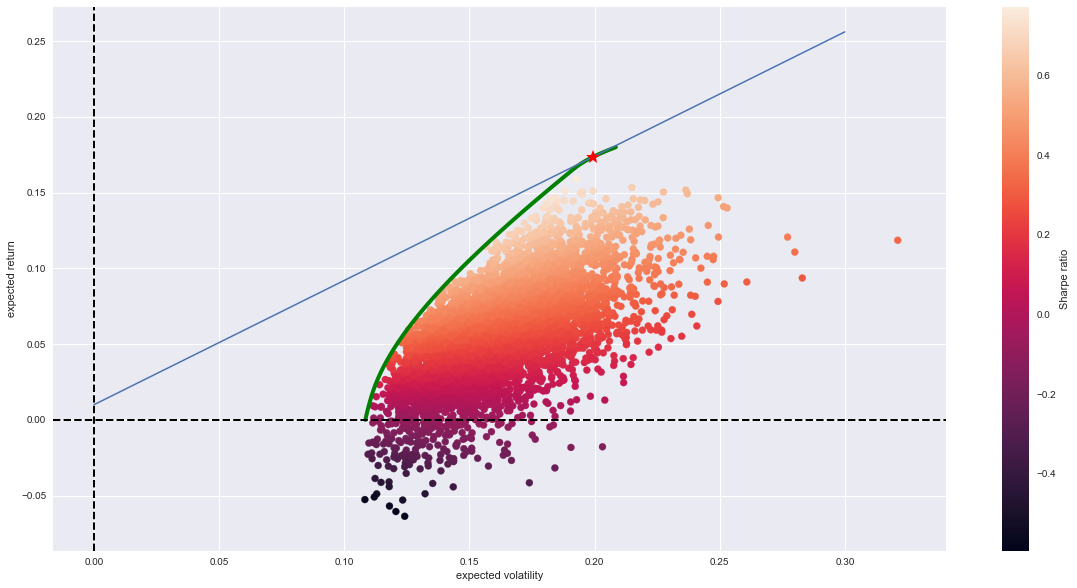

In [157]:
plt.figure(figsize=(20, 10))         
plt.scatter(portfolio_vols, portfolio_rtns,                     
            c=(np.array(portfolio_rtns) - 0.01) / np.array(portfolio_vols), marker='o')                     
            # random portfolio composition         
plt.plot(evols, erets, 'g', lw=4.0)                     
            # efficient frontier         
cx = np.linspace(0.0, 0.3)         
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)                     
            # capital market line         
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)         
plt.grid(True)         
plt.axhline(0, color='k', ls='--', lw=2.0)         
plt.axvline(0, color='k', ls='--', lw=2.0)         
plt.xlabel('expected volatility')         
plt.ylabel('expected return')         
plt.colorbar(label='Sharpe ratio');

In [158]:
cons = ({'type': 'eq', 'fun': lambda x:  portfolio_stats(x)[0] - f(opt[2])},                 
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})         
res = sco.minimize(min_func_port, len(tickers) * [1. / len(tickers),], method='SLSQP',                                
                   bounds=bnds, constraints=cons)


In [159]:
res['x'].round(3)

array([0.166, 0.   , 0.   , 0.044, 0.79 ])

# Time Series 2

In [160]:
import pandas as pd
from datetime import datetime
prices = pd.read_csv("data/^GSPC.csv")

In [161]:
prices['Date'] = pd.to_datetime(prices["Date"], infer_datetime_format=True)
prices.set_index("Date", inplace=True)

In [162]:
prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-01,16.660000,17.090000,16.650000,17.049999,17.049999,42570000
1950-02-01,17.049999,17.350000,16.990000,17.219999,17.219999,33430000
1950-03-01,17.240000,17.610001,17.070000,17.290001,17.290001,40410000
1950-04-01,17.340000,18.070000,17.340000,18.070000,18.070000,48250000
1950-05-01,18.219999,18.780001,18.110001,18.780001,18.780001,45080000


In [163]:
mth_price = prices.resample('BM')['Adj Close'].last()
mth_rtns = mth_price.pct_change()

jan_rtns = mth_rtns[mth_rtns.index.month==1]
other_rtns = mth_rtns[mth_rtns.index.month!=1]

In [164]:
from scipy import stats
print(stats.bartlett(jan_rtns, other_rtns))

BartlettResult(statistic=4.599212108275581, pvalue=0.031986653036613084)


In [165]:
pre_90s = prices[prices.index < datetime(1990,1,1)]
pre_90s.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1989-08-01,346.079987,352.730011,339.000000,351.450012,351.450012,3949100000
1989-09-01,351.450012,354.130005,341.369995,349.149994,349.149994,3035020000
1989-10-01,349.149994,360.440002,327.119995,340.359985,340.359985,4012670000
1989-11-01,340.359985,346.500000,330.910004,345.989990,345.989990,3032160000
1989-12-01,346.010010,354.100006,339.630005,353.399994,353.399994,3213420000


In [166]:
pre_90s_mth_price = pre_90s['Adj Close']
pre_90s_mth_rtns = pre_90s_mth_price.pct_change()

In [167]:
pre_90s_jan_rtns = pre_90s_mth_rtns[pre_90s_mth_rtns.index.month==1]
pre_90s_other_rtns = pre_90s_mth_rtns[pre_90s_mth_rtns.index.month!=1]

In [168]:
print(stats.bartlett(pre_90s_jan_rtns, pre_90s_other_rtns))

BartlettResult(statistic=6.233177444701499, pvalue=0.012537856336879023)


#### Heating Oil

[data](https://fred.stlouisfed.org/series/WHOILNYH)

In [169]:
import numpy as np
import datetime
import pandas as pd
df = pd.read_excel("data/WHOILNYH.xls", skiprows=10)
df.head()

,observation_date,WHOILNYH
0,1986-06-06,0.389
1,1986-06-13,0.384
2,1986-06-20,0.375
3,1986-06-27,0.374
4,1986-07-04,0.363


In [170]:
df.set_index("observation_date", inplace=True)

In [171]:
df_mth = df.resample('BM').last()

In [172]:
jul_price = df_mth[df_mth.index.month == 7]

In [173]:
jan_price = df_mth[df_mth.index.month == 1]

In [174]:
jul_price.head()

,WHOILNYH
observation_date,
1986-07-31,0.327
1987-07-31,0.542
1988-07-29,0.441
1989-07-31,0.487
1990-07-31,0.561


In [175]:
jan_price.head()

,WHOILNYH
observation_date,
1987-01-30,0.515
1988-01-29,0.493
1989-01-31,0.525
1990-01-31,0.611
1991-01-31,0.728


In [178]:
res = (jan_price.values - jul_price.values)/jul_price.values

In [179]:
res.mean()

0.10816980919231184

In [180]:
res.std()

0.35130734584470585

In [181]:
res.mean() / res.std()

0.3079064826618454

In [182]:
type(res)

numpy.ndarray

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

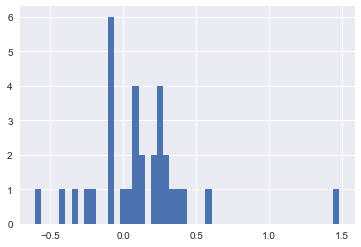

In [184]:
plt.hist(res, bins=50);

In [185]:
len(res[res < 0])

12

In [186]:
len(res[res > 0])

20

In [187]:
len(res)

32

In [188]:
res[res < 1.].mean()

0.06390210142432191

In [189]:
res[res < 1.].sum()

1.9809651441539795

In [190]:
res[res < 1.].mean() / res[res < 1.].sum()

0.03225806451612903

***